## STATISTICS

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(file_groups):
    dataframes = {}
    for group_name, paths in file_groups.items():
        dataframes[group_name] = {}
        for file_type, path in paths.items():
            dataframes[group_name][file_type] = pd.read_csv(path)
    return dataframes

In [3]:
def plot_single_experiment(df, title):
    metrics = ["R2", "Q2", "MSE", "MAE"]
    df = df.set_index("Model")[metrics]
    
    plt.figure(figsize=(10, 6))
    df.plot(kind="bar", rot=45)
    plt.title(title)
    plt.ylabel("Metric Value")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='best')
    plt.show()

In [ ]:
def compare_multiple_experiments(dataframes):
    results = {}
    
    for category in ["test", "best", "retrain"]:
        metrics = ["Q2", "MSE", "MAE"] if category == "test" else ["R2", "Q2", "MSE", "MAE"]
        comparison_df = pd.DataFrame()
        model_names = {}
        
        for name, df_dict in dataframes.items():
            df = df_dict[category]
            best_idx = df["Q2"].idxmax() if category == "test" else df["R2"].idxmax()
            best_model = df.loc[best_idx, metrics]
            comparison_df[name] = best_model
            model_names[name] = df.loc[best_idx, "Model"]
        comparison_df.loc["Best Model"] = model_names
        results[category] = comparison_df.T
        fig, axes = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 6))
        fig.suptitle(f"Comparison of Metrics Across Experiments ({category})")
        
        if len(metrics) == 1:
            axes = [axes]
        
        for ax, metric in zip(axes, metrics):
            comparison_df.T[metric].plot(kind="bar", rot=45, ax=ax)
            ax.set_title(metric)
            ax.set_ylabel(metric)
            ax.grid(axis='y', linestyle='--', alpha=0.7)
        
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
    
    return results

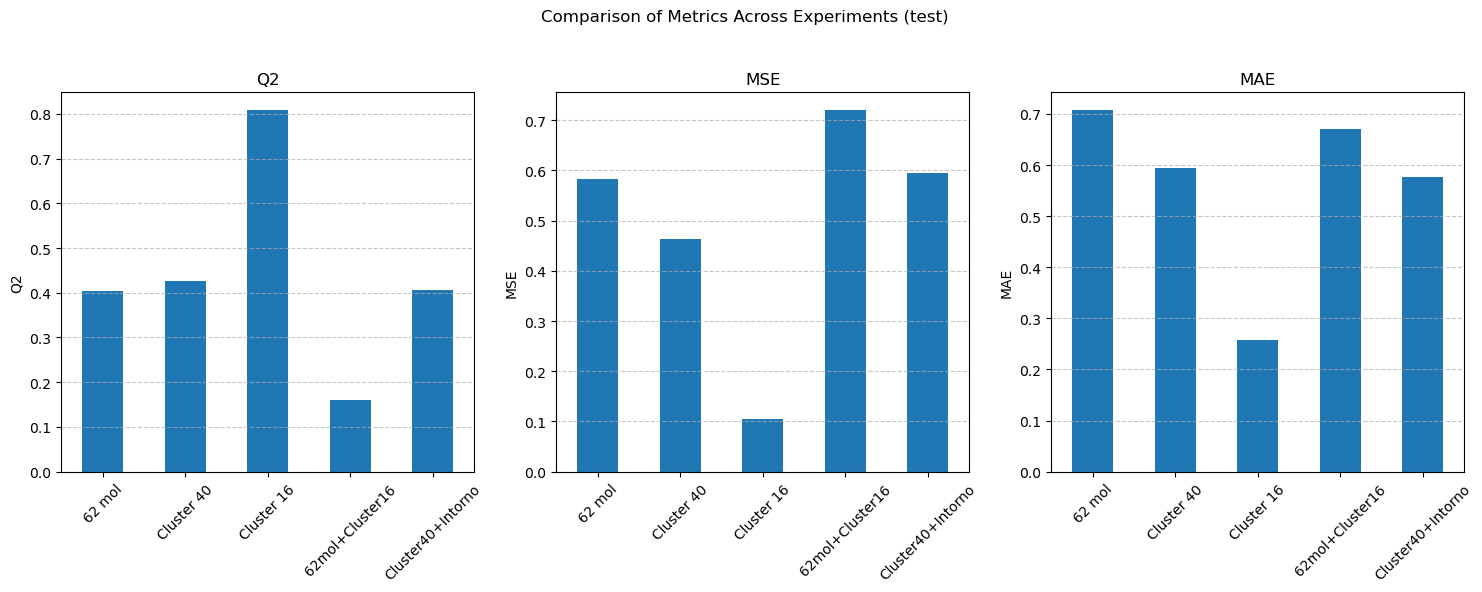

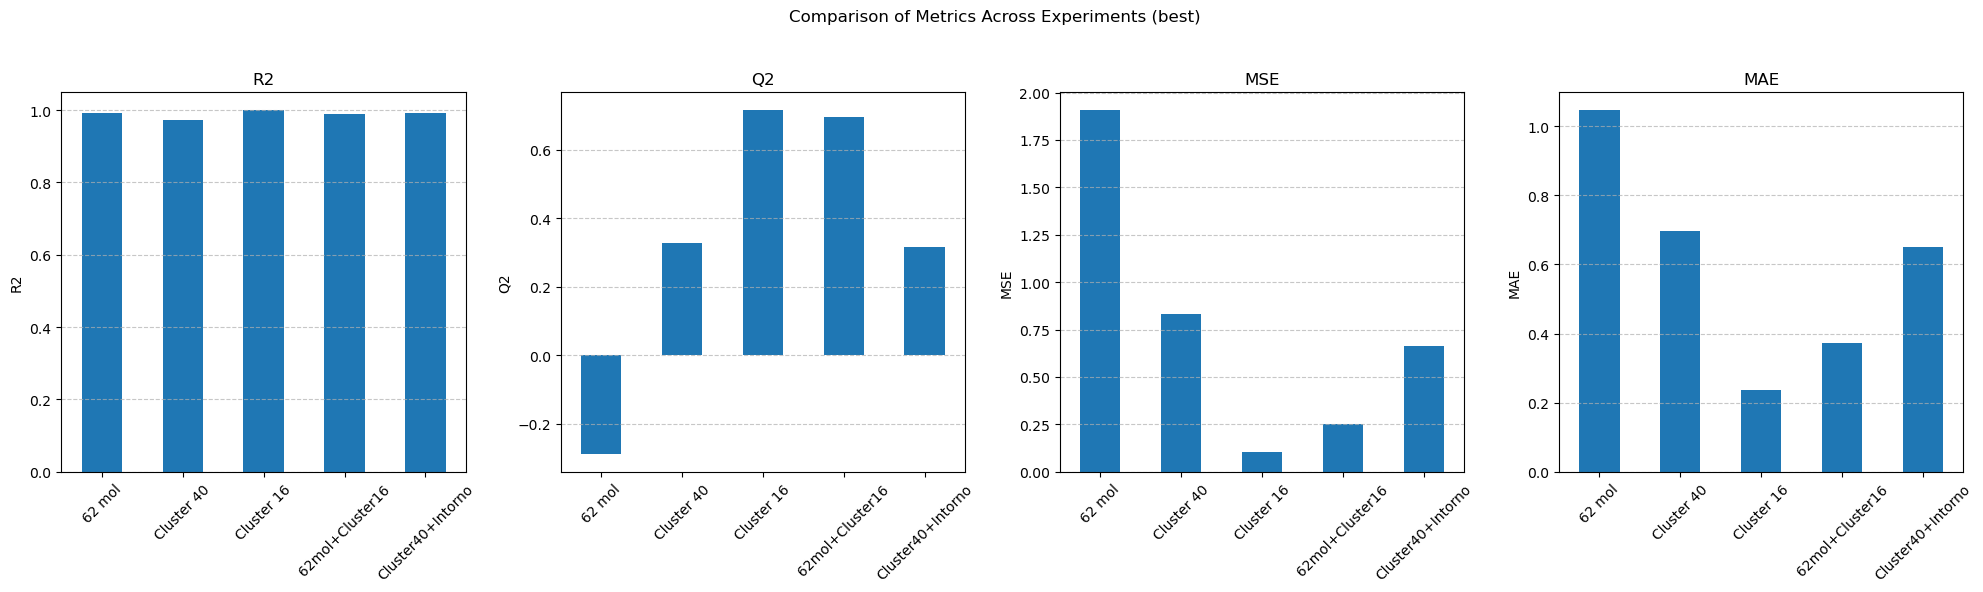

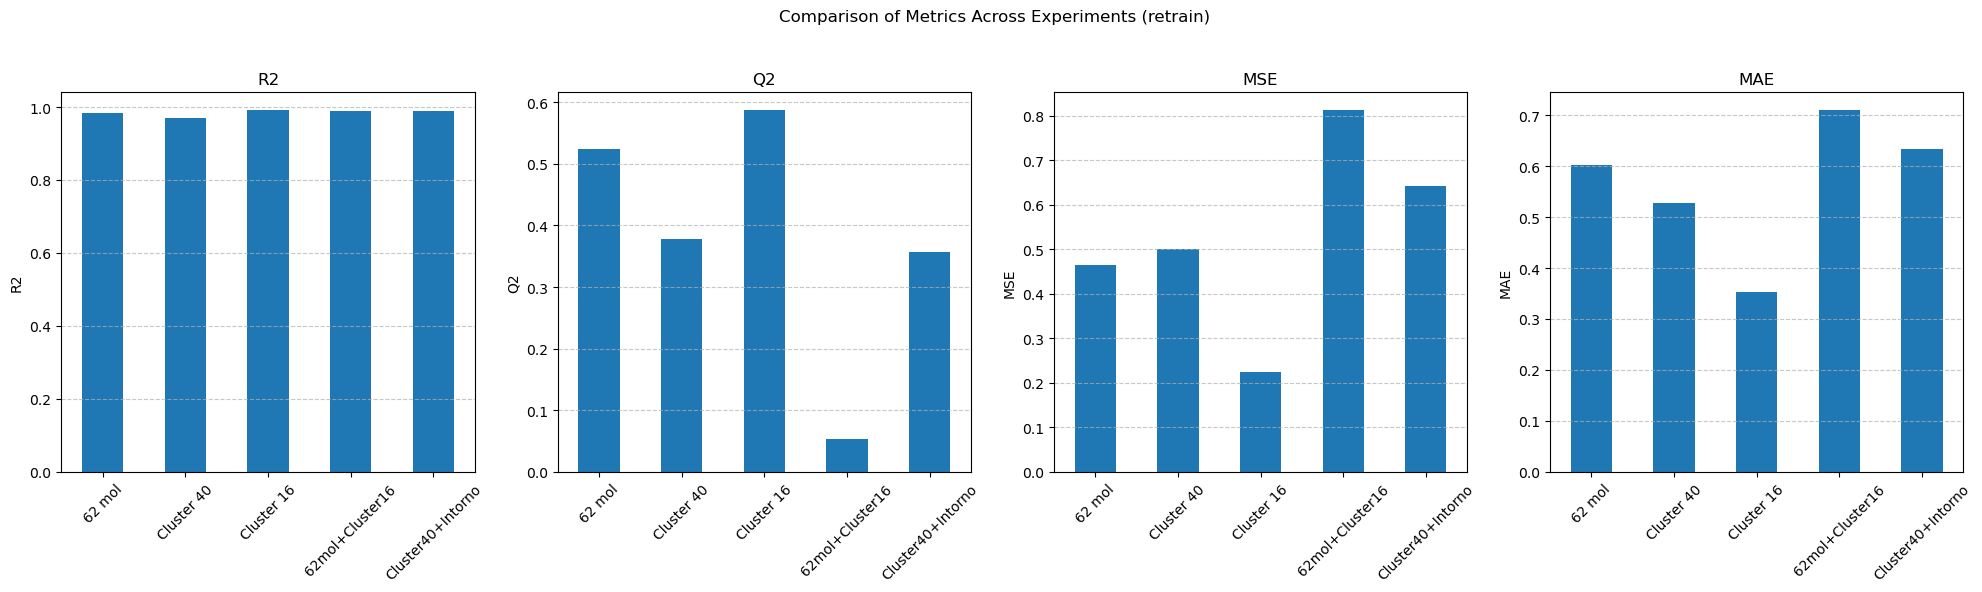

                         Q2       MSE       MAE Best Model
62 mol             0.403722  0.583119  0.706879   AdaBoost
Cluster 40         0.425697  0.463373  0.594663        MLP
Cluster 16         0.807676  0.104647  0.257974        KNN
62mol+Cluster16    0.160788  0.719629  0.671283        SVR
Cluster40+Intorno  0.405538  0.594295  0.577169        SVR
                         R2        Q2       MSE       MAE         Best Model
62 mol              0.99118 -0.289929  1.905765  1.046099  Gradient Boosting
Cluster 40          0.97174  0.328348   0.82936  0.698331            XGBoost
Cluster 16         0.999153  0.716977  0.102142  0.236442           AdaBoost
62mol+Cluster16    0.989365  0.694612  0.253346  0.373633                SVR
Cluster40+Intorno  0.992127  0.314643   0.66513    0.6492            XGBoost
                         R2        Q2       MSE       MAE         Best Model
62 mol             0.983845   0.52435  0.465153  0.603077  Gradient Boosting
Cluster 40         0.969596  0

In [14]:
file_groups = {
    "62 mol": {"test": "/home/federica/LAB2/egfr_qsar/qsar_results/osimertinib_62mol/test_results.csv", "best": "/home/federica/LAB2/egfr_qsar/qsar_results/osimertinib_62mol/best_model.csv", "retrain": "/home/federica/LAB2/egfr_qsar/qsar_results/osimertinib_62mol/best_retrain.csv"},
    "Cluster 40": {"test": "/home/federica/LAB2/egfr_qsar/qsar_results/osimertinib_cluster40/test_results.csv", "best": "/home/federica/LAB2/egfr_qsar/qsar_results/osimertinib_cluster40/best_model.csv", "retrain": "/home/federica/LAB2/egfr_qsar/qsar_results/osimertinib_cluster40/best_retrain.csv"},
    "Cluster 16": {"test": "/home/federica/LAB2/egfr_qsar/qsar_results/cluster_16_17/test_results.csv", "best": "/home/federica/LAB2/egfr_qsar/qsar_results/cluster_16_17/best_model.csv", "retrain": "/home/federica/LAB2/egfr_qsar/qsar_results/cluster_16_17/best_retrain.csv"},
    "62mol+Cluster16": {"test": "/home/federica/LAB2/egfr_qsar/qsar_results/62mol_cluster16_17/test_results.csv", "best": "/home/federica/LAB2/egfr_qsar/qsar_results/62mol_cluster16_17/best_model.csv", "retrain": "/home/federica/LAB2/egfr_qsar/qsar_results/62mol_cluster16_17/best_retrain.csv"},
    "Cluster40+Intorno": {"test": "/home/federica/LAB2/egfr_qsar/qsar_results/cluster40_clusterintorno/test_results.csv", "best": "/home/federica/LAB2/egfr_qsar/qsar_results/cluster40_clusterintorno/best_model.csv", "retrain": "/home/federica/LAB2/egfr_qsar/qsar_results/cluster40_clusterintorno/best_retrain.csv"}
}
dataframes = load_data(file_groups)
res=compare_multiple_experiments(dataframes)
print(res["test"])
print(res["best"])
print(res["retrain"])

## Immagine struttura molecole

In [13]:
from rdkit import Chem
from rdkit.Chem import Draw

smiles = "COc1cc(Nc2cc(NC(=O)Nc3c(Cl)cccc3Cl)ncn2)cc(OC)c1"
mol = Chem.MolFromSmiles(smiles)
Draw.MolToImage(mol) 
Draw.MolToFile(mol, "/home/federica/LAB2/img/nuove/618MOL.png") 

In [57]:
def plot_model_performance_best_bar(dataframes, model_name):
    best_results = {}
    for dataset_name, df_dict in dataframes.items():
        df = df_dict["retrain"]
        if model_name in df["Model"].values:
            metrics = df[df["Model"] == model_name][["R2", "Q2", "MSE", "MAE"]].iloc[0]
            best_results[dataset_name] = metrics
        else:
            best_results[dataset_name] = None
    datasets = list(best_results.keys())
    metrics = ["R2", "Q2", "MSE", "MAE"]
    performance = {metric: [] for metric in metrics}

    for dataset in datasets:
        if best_results[dataset] is not None:
            for metric in metrics:
                performance[metric].append(best_results[dataset][metric])
        else:
            for metric in metrics:
                performance[metric].append(None)

    x = range(len(datasets))
    bar_width = 0.2
    offsets = [-1.5, -0.5, 0.5, 1.5]

    plt.figure(figsize=(12, 6))
    for i, metric in enumerate(metrics):
        plt.bar(
            [pos + offsets[i] * bar_width for pos in x],
            performance[metric],
            width=bar_width,
            label=metric
        )

    plt.title(f"Performance of Model '{model_name}' Category Across Datasets", fontsize=14, fontweight="bold")
    plt.xlabel("Dataset", fontsize=12)
    plt.ylabel("Metric Value", fontsize=12)
    plt.xticks(x, datasets, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title="Metrics", fontsize=10)
    plt.tight_layout()
    plt.savefig(f"/home/federica/LAB2/img/{model_name}.png")


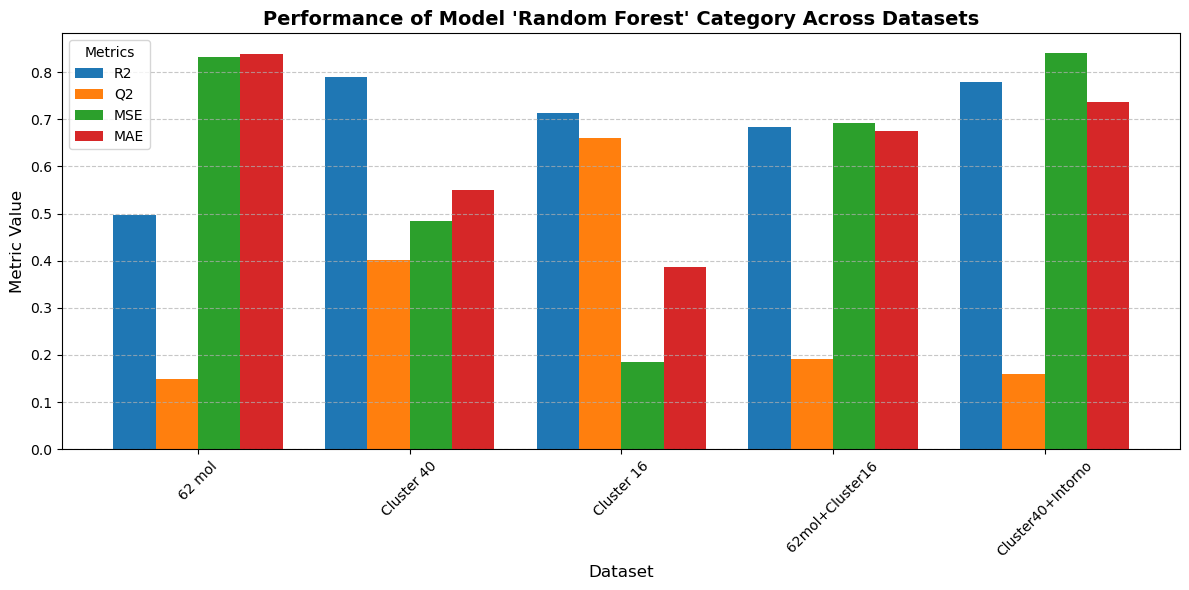

In [64]:
plot_model_performance_best_bar(dataframes,"Random Forest")